In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\dataset.csv", delimiter=",")
df['date'] = pd.to_datetime(df['date'])

In [4]:
# count the number of customers per day 
df1 = df['customer_id'].groupby(df['date']).count()
df1.rename("number_of_customers", inplace=True)
df1.head()

date
2017-04-26    173
2017-04-27    223
2017-04-28    233
2017-04-29    227
2017-04-30    214
Name: number_of_customers, dtype: int64

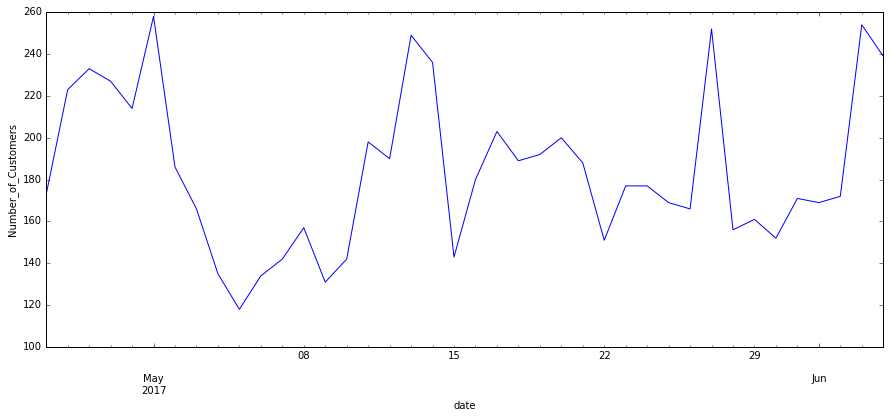

In [5]:
# plot the time series
df1.plot(figsize=(15, 6))
plt.ylabel('Number_of_Customers')

The specific time series (the count of customers over time) seems to be mean- stationary (the mean is constant) with a mean equals to 160-170. In addition, the time series has great variance for the number of customers and it has no trend. However for applying the Box-Jenkins method we need data from more months and until August 2017 for making forecasting.

In [6]:
# compute the sum of revenues per group over time
df2 = df.groupby(['date', 'group'])[['revenues']].sum()
df2.head()

revenues
date       group          
2017-04-26 a         50.50
           b         66.50
2017-04-27 a         37.85
           b        243.05
2017-04-28 a          1.89

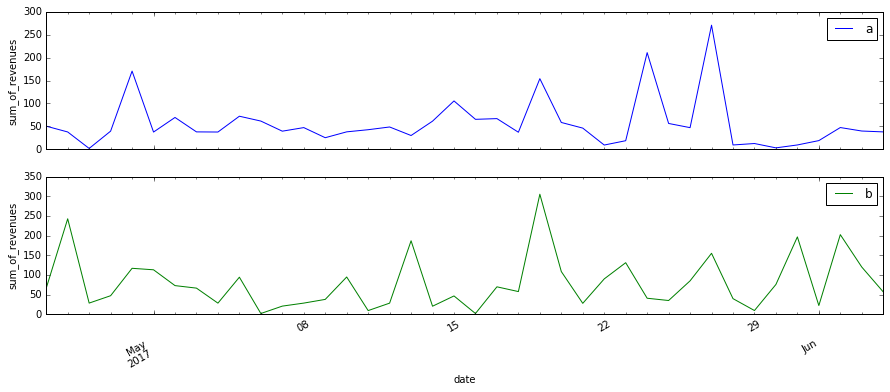

In [7]:
# visualize the results
plot_df = df2.unstack('group').loc[:, 'revenues']
axes = plot_df.plot(figsize=(15,6), subplots=True)
axes[0].set_ylabel('sum_of_revenues')
axes[1].set_ylabel('sum_of_revenues')
plt.show()

Both time series are mean stationary and have a mean equal to 50. Moreover they have no trend. The variance of the first time series (the sum of revenues over time for the group a) appears to be small until 17th May but after 17th May and until 28th May the variance appears to be great and after 28th May gets low again. The second time series (the sum of revenues for the group b) has also small variance until 17th May. After 17th May the variance increases and it is greater than the variance of the time series for the group a. However we need more data and until August 2017 for applying the Box-Jenkins method.

In [8]:
# add a new column named buyers that has value 1 if the revenue of the customer
# is > 0 and 0 otherwise
df['buyers'] = np.where(df['revenues'] > 0, 1, 0)
df.head()

,date,revenues,group,customer_id,buyers
0,2017-04-26,0.00,b,164,0
1,2017-04-26,0.00,b,246,0
2,2017-04-26,0.00,a,665,0
3,2017-04-26,28.59,b,226,1
4,2017-04-26,0.00,a,367,0


In [9]:
# calculate the number of buyers over time
df3 = df['customer_id'][df['buyers'] == 1].groupby(df['date']).count()
# divide this number with the total number of customers
df3.rename("number_of_buyers", inplace=True)
df4 = df3 / df1
df4.rename("buyers_over_customers", inplace=True)
df4

date
2017-04-26    0.046243
2017-04-27    0.026906
2017-04-28    0.012876
2017-04-29    0.026432
2017-04-30    0.032710
2017-05-01    0.011628
2017-05-02    0.032258
2017-05-03    0.036145
2017-05-04    0.044444
2017-05-05    0.076271
2017-05-06    0.044776
2017-05-07    0.042254
2017-05-08    0.031847
2017-05-09    0.045802
2017-05-10    0.035211
2017-05-11    0.020202
2017-05-12    0.031579
2017-05-13    0.036145
2017-05-14    0.029661
2017-05-15    0.027972
2017-05-16    0.027778
2017-05-17    0.049261
2017-05-18    0.037037
2017-05-19    0.046875
2017-05-20    0.060000
2017-05-21    0.026596
2017-05-22    0.026490
2017-05-23    0.022599
2017-05-24    0.062147
2017-05-25    0.047337
2017-05-26    0.054217
2017-05-27    0.063492
2017-05-28    0.025641
2017-05-29    0.012422
2017-05-30    0.032895
2017-05-31    0.076023
2017-06-01    0.017751
2017-06-02    0.058140
2017-06-03    0.023622
2017-06-04    0.025105
Name: buyers_over_customers, dtype: float64